In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir("C:\\Users\\ashut\\Desktop\\AnalytixLab Classes\\python teram 2\\Python Foundation Case Study 4 - Python Visualization Case Study\\Case Study 4 - Python Visualizations Case Study")
Sales = pd.read_csv("SalesData.csv")
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


### 1. Compare Sales by region for 2016 with 2015 using bar chart


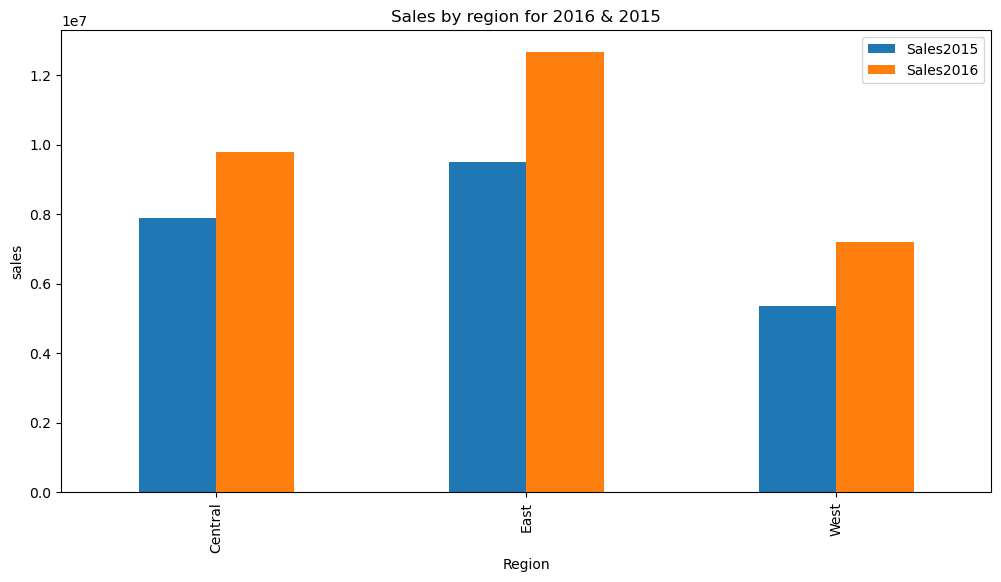

In [3]:
sale_region = Sales[['Region','Sales2015','Sales2016']].groupby('Region').sum().round()
sale_region.plot(kind='bar',figsize = (12,6))
plt.title('Sales by region for 2016 & 2015')
plt.ylabel("sales")
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.


<Figure size 2000x1000 with 0 Axes>

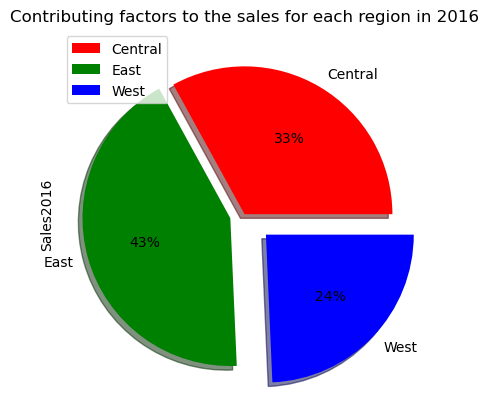

In [5]:
sales_contribution = Sales[['Region','Sales2016']].groupby('Region').sum().round(2)
plt.figure(figsize=(20,10))
sales_contribution.plot(kind='pie',subplots=True,autopct="%1.0f%%",labels=["Central","East","West"],shadow=True,explode=[0.0,0.1,0.2],colors=['r', 'g', 'b'])
plt.legend(loc='upper left')
plt.title("Contributing factors to the sales for each region in 2016")
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers



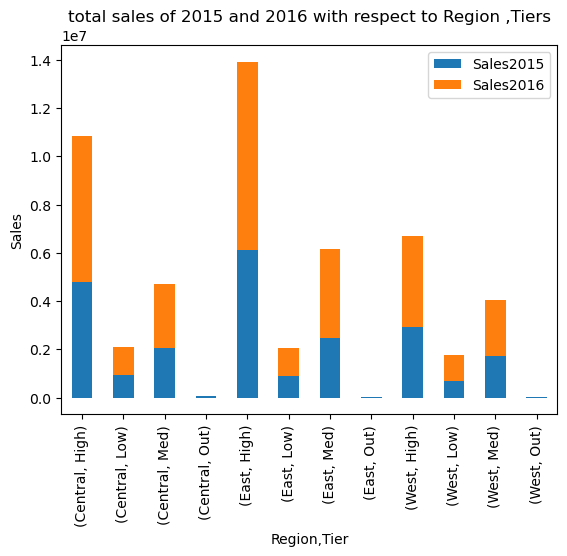

In [7]:
region_tier = Sales[['Region','Tier','Sales2015','Sales2016']].groupby(by=['Region','Tier']).sum().round()
region_tier.plot(kind='bar',stacked = True)
plt.ylabel('Sales')
plt.title('total sales of 2015 and 2016 with respect to Region ,Tiers')
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?


In [9]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [10]:
decline_state = Sales[['State','Region','Sales2015','Sales2016']].groupby(['Region','State']).sum().round()
decline_state


Sales2015  Sales2016
Region  State                      
Central AL      509104.0   595828.0
        AR      213317.0   227608.0
        IL      621794.0   784307.0
        IN      316678.0   599672.0
        KY      531215.0   633219.0
        LA      479366.0   680303.0
        MI      568652.0   707248.0
        MS      304578.0   220411.0
        OH      927688.0  1221085.0
        OK      248461.0   339644.0
        PA      300267.0   287792.0
        TN      437039.0   552230.0
        TX     1712440.0  2013116.0
        WI      304425.0   440380.0
        WV      416706.0   484964.0
East    CT      197203.0   323502.0
        DC      216724.0   257422.0
        FL     1660162.0  2508232.0
        GA      681546.0   946920.0
        MA      419279.0   687096.0
        MD      527309.0   750009.0
        ME       77426.0   183673.0
        NC     1292802.0  1610521.0
        NH      136419.0   144718.0
        NJ      520419.0   782289.0
        NY     1725415.0  1703136.0
        PA      785093.0   894319.0
        RI      156312.0   162455.0
        SC      247812.0   463414.0
        TN       49677.0    70109.0
        VA      819319.0  1179415.0
West    AZ      388988.0   519508.0
        CA     1891621.0  2396883.0
        CO      402339.0   504654.0
        IA      102271.0   146160.0
        ID       92374.0   115768.0
        IL       93754.0   122480.0
        KS      228458.0   285021.0
        MN      314230.0   322052.0
        MO      444462.0   724166.0
        NE       69816.0    85873.0
        NM       88280.0   132512.0
        NV      205794.0   281423.0
        OR      262924.0   438358.0
        SD       75490.0   166257.0
        TX      253073.0   349579.0
        UT      113362.0   173210.0
        WA      322509.0   445785.0

In [11]:
East_region=decline_state.loc['East'].T
East_region

State,CT,DC,FL,GA,MA,MD,ME,NC,NH,NJ,NY,PA,RI,SC,TN,VA
Sales2015,197203.0,216724.0,1660162.0,681546.0,419279.0,527309.0,77426.0,1292802.0,136419.0,520419.0,1725415.0,785093.0,156312.0,247812.0,49677.0,819319.0
Sales2016,323502.0,257422.0,2508232.0,946920.0,687096.0,750009.0,183673.0,1610521.0,144718.0,782289.0,1703136.0,894319.0,162455.0,463414.0,70109.0,1179415.0


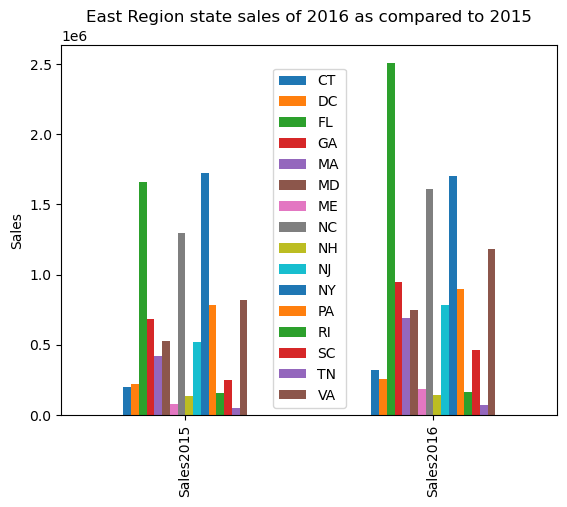

In [12]:
East_region.plot(kind='bar')
plt.ylabel('Sales')
plt.title('East Region state sales of 2016 as compared to 2015')
plt.legend(loc='best')
plt.show()

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [14]:
tier_division = Sales[['Tier','Division','Units2015','Units2016']].groupby(['Tier','Division']).sum()
High_tier = tier_division.loc['High']
High_tier

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


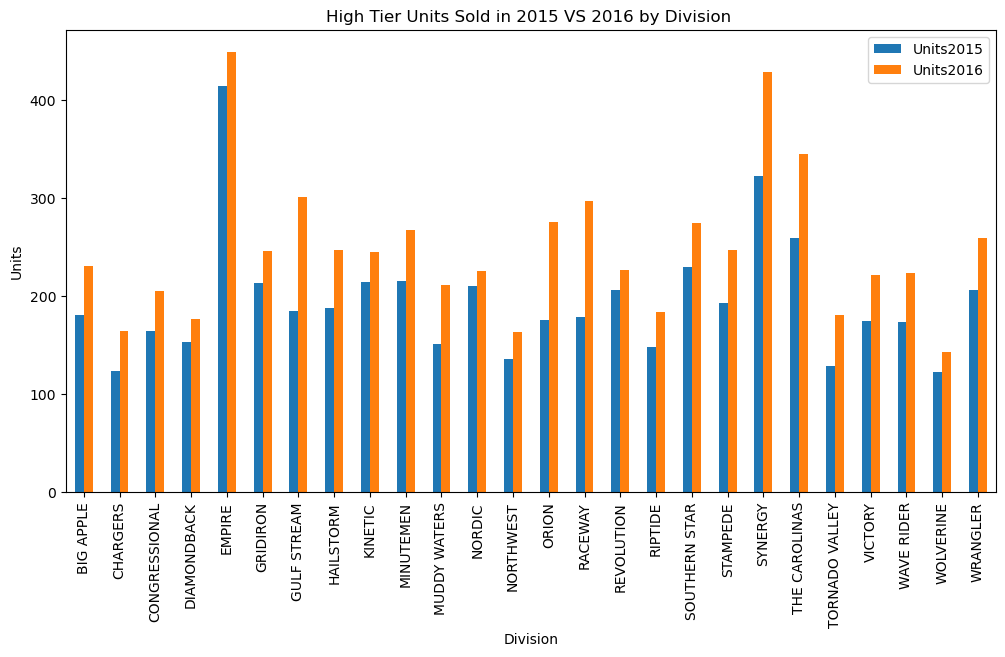

In [15]:
High_tier.plot(kind='bar',figsize =(12,6))
plt.ylabel('Units')
plt.title('High Tier Units Sold in 2015 VS 2016 by Division ')
plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
#### • Jan - Mar : Q1
#### • Apr - Jun : Q2
#### • Jul - Sep : Q3
#### • Oct - Dec : Q4


In [17]:
Sales .head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [18]:
Sales['Qtr'] = np.where(Sales['Month'].isin(['Jan', 'Feb', 'Mar']), 'Q1',
                np.where(Sales['Month'].isin(['Apr', 'May', 'Jun']), 'Q2',
                np.where(Sales['Month'].isin(['Jul', 'Aug', 'Sep']), 'Q3', 'Q4')))
Sales


,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


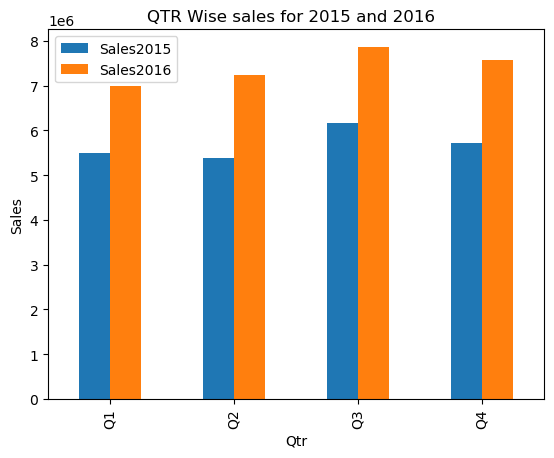

In [20]:
qtr_sales = Sales[['Qtr','Sales2015','Sales2016']].groupby('Qtr').sum()
qtr_sales.plot(kind='bar')
plt.ylabel('Sales')
plt.title('QTR Wise sales for 2015 and 2016  ')
plt.legend(loc='upper left')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
#####  (Draw 4 pie charts representing a Quarter for each Tier)

In [22]:

pivot_qtr =Sales.pivot_table(index='Qtr',columns='Tier',values='Sales2016').round(2)

In [23]:
pivot_qtr

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.68,5516.47,7654.04,0.00
Q2,8752.02,5031.61,8758.16,0.00
Q3,9334.40,5446.42,8197.98,-360.95
Q4,9386.14,5052.10,8307.60,0.00


In [24]:
pivot_qtr[pivot_qtr < 0] = 0 #pie plot doesn't allow negative values so removing out 
pivot_qtr

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.68,5516.47,7654.04,0.0
Q2,8752.02,5031.61,8758.16,0.0
Q3,9334.40,5446.42,8197.98,0.0
Q4,9386.14,5052.10,8307.60,0.0


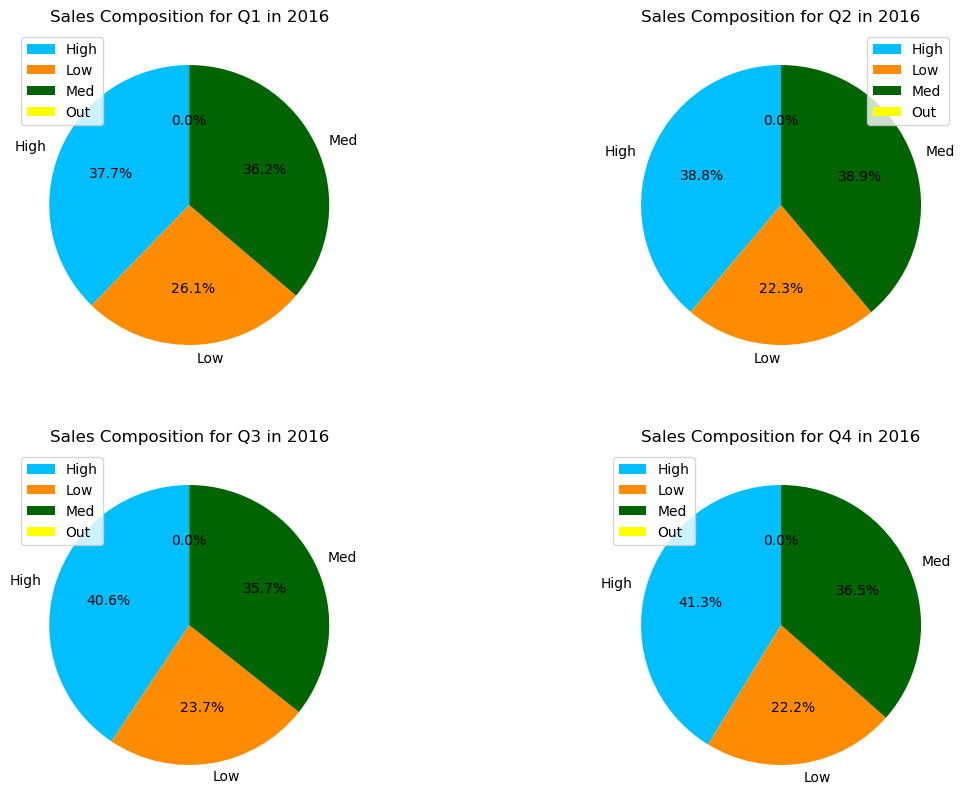

In [25]:
## Plot pie charts for each quarter
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

colors = ['deepskyblue', 'darkorange', 'darkgreen','Yellow']  # Colors for different tiers

for i, qtr in enumerate(pivot_qtr.index):
    ax = axes[i]
    pivot_qtr.loc[qtr].plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=colors,
        ax=ax,
        startangle=90,
        legend=True,
        labels=pivot_qtr.columns
    )
    ax.set_ylabel('')
    ax.set_title(f'Sales Composition for {qtr} in 2016')
plt.show()
